In [4]:
import sys
sys.path.append('/opt/ml/code/stage1')

In [5]:
import pandas as pd
import os
import stage1.data as data

In [16]:
from stage1.utils import *
from stage1.trainer import *

## Single criterion revision

In [6]:
label_csv = '/opt/ml/output/effnet-b3-multi+smaller+ce+adamp_0_2021-04-08-09_54_52.937448.csv'

age_csv = '/opt/ml/output/effnet-b0-1a-age-soft+raw+ce+adamp_2021-04-08-01_08_05.839885.csv'
gender_csv = ''
mask_csv = ''

In [7]:
if label_csv:
    labels = pd.read_csv(label_csv, index_col='ImageID')
elif not (age_csv and gender_csv and mask_csv):
    raise ValueError

if age_csv:
    ages = pd.read_csv(age_csv, index_col='ImageID')
else:
    ages = pd.DataFrame(data={'ans': labels.ans.map(data.age_from_label)}, index=labels.index)
    
if gender_csv:
    genders = pd.read_csv(gender_csv, index_col='ImageID')
else:
    genders = pd.DataFrame(data={'ans': labels.ans.map(data.gender_from_label)}, index=labels.index)
    
if mask_csv: 
    masks = pd.read_csv(mask_csv, index_col='ImageID')
else:
    masks = pd.DataFrame(data={'ans': labels.ans.map(data.mask_from_label)}, index=labels.index)

info = pd.read_csv('/opt/ml/output/info.csv', index_col='ImageID')

assert (labels.index == info.index).all()
assert (ages.index == info.index).all()
assert (genders.index == info.index).all()
assert (masks.index == info.index).all()

In [8]:
labels.head()

,ans
ImageID,
cbc5c6e168e63498590db46022617123f1fe1268.jpg,14
0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2
b549040c49190cedc41327748aeb197c1670f14d.jpg,14
4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,14
248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12


In [9]:
ages.ans = ages.ans.map(data.age_from_label)
ages.ans.value_counts()

0    5428
2    4051
1    3121
Name: ans, dtype: int64

In [10]:
new_labels = pd.DataFrame(
    data={'ans': data.labels(ages.ans, genders.ans, masks.ans)},
    index=labels.index
)
new_labels.head()

,ans
ImageID,
cbc5c6e168e63498590db46022617123f1fe1268.jpg,14
0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2
b549040c49190cedc41327748aeb197c1670f14d.jpg,14
4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12


In [11]:
(new_labels - labels).sum()

ans    529
dtype: int64

In [17]:
prefix = "[age]effnet-b3-age-smaller+[gender][mask]effnet-b3-multi-upaug2"

csv_name = f"{prefix}__{filename_from_datetime(datetime.today().time())}.csv"
csv_path = os.path.join('/opt/ml/output/', csv_name)

new_labels.to_csv(csv_path)

print(f"Saved result: {csv_path}")

Saved result: /opt/ml/output/[age]effnet-b3-age-smaller+[gender][mask]effnet-b3-multi-upaug2__09_58_06.443771.csv


# 나중에 해볼 것

In [23]:
'''[LATER]effnet-b4-1a (smaller)(CE)(AdamP)
>>> CHECKPOINTS
[lowest loss]()<- ""
[best f1 score]()<- ""
'''

# effnet_b4_1a = EfficientNet.from_pretrained('efficientnet-b4')
# effnet_b4_1a._fc = nn.Linear(effnet_b4_1a._fc.in_features, 18)
# setattr(effnet_b4_1a, "name", "effnet-b4-1a+smaller+ce+adamp")

# effnet_b4_1a_logger = CSVLogger()

# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/smaller_',
#     model = effnet_b4_1a,
#     logger = effnet_b4_1a_logger, 
#     classifying = 'all', 
#     upscale = False,
#     cutmix = False,
#     criterion = 'CrossEntropyLoss',
#     optimizer = 'AdamP',
#     lr = 1e-3,
#     state_path = '/opt/ml/output/models/2021-04-08-05_09_51.657508_effnet-b4-1a+smaller+ce+adamp_.pth',
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.data.train_cutmix = branch.cutmix
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except KeyError:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))

# trainer.train_and_save()
# # trainer.valid()
# # trainer.infer_and_save_csv()

Loaded pretrained weights for efficientnet-b4
[INFO]
model=effnet-b4-1a+smaller+ce+adamp
device=cuda:0(Tesla P40)
data size=(12959 + 3239), batch size=16
optimizer.name=AdamP
epochs=20, lr=0.001, weight_decay=0.0001, betas=(0.9, 0.999)

Start of traning.
[Epoch 001]  Loss: 0.50793,  Acc: 84.104,  F1 Score: 0.58141  (14:42)
[Valid 001]  Loss: 0.27447,  Acc: 90.861,  F1 Score: 0.75372
Saved model: /opt/ml/output/models/2021-04-08-05_09_51.657508_effnet-b4-1a+smaller+ce+adamp_.pth
[Epoch 002] (Batch #123)  Loss: 0.23679,  Acc: 92.893  (02:15)

KeyboardInterrupt: 

In [ ]:
# '''[STRATIFIED FOLD #3] effnet-b4-multi (smaller)(CE)(AdamP)
# >>> CHECKPOINTS
# [lowest loss]()<- ""
# [best f1 score]()<- ""
# '''

# fold_idx = 3


# effnet_b3_multi = timm.models.efficientnet_b3(True)
# effnet_b3_multi.classifier = MultiheadClassifier(
#     in_features=effnet_b3_multi.classifier.in_features, 
#     out_features=18
# )
# setattr(effnet_b3_multi, "name", "effnet-b3-multi+smaller+ce+adamp")
# effnet_b3_multi_logger = CSVLogger()

# branch = ConfigBranch(
#     train_path = f'/opt/ml/input/data/train/train_{fold_idx}',
#     valid_path = f'/opt/ml/input/data/train/valid_{fold_idx}',
#     model = effnet_b3_multi,
#     logger = effnet_b3_multi_logger,
#     classifying = 'all', 
#     upscale = True,
#     cutmix = False,
#     criterion = 'CrossEntropyLoss',
#     optimizer = 'AdamP',
#     lr = 1e-3,
#     state_path = '',
# )

# config.path.train = branch.train_path
# config.path.valid = branch.valid_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.data.train_cutmix = branch.cutmix
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except KeyError:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))

# trainer.train_and_save()
# # trainer.valid()
# # trainer.infer_and_save_csv()

In [ ]:
'''
>>> CHECKPOINTS
[lowest loss]()<- ""
[best f1 score]()<- ""
'''

config.data.train_cutmix = True
config.model.state_path = ''
# config.train.lr.base = 

try:
    trainer().load_state_dict_to_model()
except KeyError:
    trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))

trainer.train_and_save()
# trainer.valid()
# trainer.infer_and_save_csv()

In [25]:
'''effnet-b0-1a-age-soft (raw)(nn.CrossEntropyLoss)(AdamP)
>>>CHECKPOINTS
[lowest loss]()<- " /opt/ml/output/models/2021-04-08-00_55_12.825011_effnet-b0-1a-age-soft+raw+ce+adamp_.pth"
[best f1 score]()<- ""
'''

# effnet_b0_1a = timm.models.efficientnet_b0(pretrained=True)
# effnet_b0_1a.classifier = nn.Linear(effnet_b0_1a.classifier.in_features, 3)
# setattr(effnet_b0_1a, "name", "effnet-b0-1a-age-soft+raw+ce+adamp")
# effnet_b0_1a_logger = CSVLogger()

# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/all_',
#     model = effnet_b0_1a,
#     logger = effnet_b0_1a_logger, 
#     classifying = 'age', 
#     soften_age = True,
#     upscale = False,
#     criterion = SoftKLDivLoss(T=1),
#     optimizer = 'AdamP',
#     lr = 1e-3,
#     state_path = '/opt/ml/output/models/2021-04-08-00_55_12.825011_effnet-b0-1a-age-soft+raw+ce+adamp_.pth',
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.soften_age = branch.soften_age
# config.data.upscale = branch.upscale
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))

# # trainer.train_and_save()
# # trainer.valid()
# trainer.infer_and_save_csv()

'effnet-b0-1a-age-soft (raw)(nn.CrossEntropyLoss)(AdamP)\n>>>CHECKPOINTS\n[lowest loss]()<- " /opt/ml/output/models/2021-04-08-00_55_12.825011_effnet-b0-1a-age-soft+raw+ce+adamp_.pth"\n[best f1 score]()<- ""\n'

In [36]:
'''effnet-b0-1a-all (smaller)(ArcFaceLoss)(AdamP)
>>> CHECKPOINTS
[lowest loss](1.69499)<- "/opt/ml/output/models/2021-04-08-02_22_16.155344_effnet-b0-1a+smaller+ce+adamp_.pth"
[best f1 score](0.93921)<- "/opt/ml/output/models/2021-04-08-02_22_16.155344_effnet-b0-1a+smaller+ce+adamp_.pth"
'''

# effnet_b0_1a = timm.models.efficientnet_b0(pretrained=True)
# effnet_b0_1a.classifier = nn.Linear(effnet_b0_1a.classifier.in_features, 18)
# setattr(effnet_b0_1a, "name", "effnet-b0-1a+smaller+ce+adamp")

# effnet_b0_1a__logger = CSVLogger()

# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/smaller_',
#     model = effnet_b0_1a,
#     logger = effnet_b0_1a__logger, 
#     classifying = 'all', 
#     upscale = False,
#     criterion = 'ArcFaceLoss',
#     optimizer = 'AdamP',
#     lr = 1e-3,
#     state_path = '/opt/ml/output/models/archive/2021-04-08-02_22_16.155344_effnet-b0-1a+smaller+ce+adamp_.pth',
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except KeyError:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))

# # trainer.train_and_save()
# trainer.valid()
# trainer.infer_and_save_csv()

Loaded state dict to model.
[Valid 039]  Loss: 1.69499,  Acc: 97.530,  F1 Score: 0.93921
effnet-b0-1a+smaller+ce+adamp: End of evaluation (01:02)
Saved result: /opt/ml/output/effnet-b0-1a+smaller+ce+adamp_2021-04-08-02_44_35.293591.csv


'/opt/ml/output/effnet-b0-1a+smaller+ce+adamp_2021-04-08-02_44_35.293591.csv'

In [29]:
'''[LATER]effnet-b0-1-1-multi (raw)(nn.CrossEntropyLoss)(AdamP)
>>> CHECKPOINTS
[lowest loss]()   <-  ""
[best f1 score]() <-  ""
'''

# effnet_b0_1_1_multi = EfficientNetWithMultihead(arc="efficientnet-b0")
# effnet_b0_1_1_multi.name = "effnet-b0-1-1-multi-raw+ce(as)+adamp"
# effnet_b0_1_1_multi__logger = CSVLogger()


# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/all_',
#     model = effnet_b0_1_1_multi,
#     logger = effnet_b0_1_1_multi__logger, 
#     classifying = 'all', 
#     upscale = False,
#     criterion = nn.CrossEntropyLoss(),
#     optimizer = 'AdamP',
#     lr = 1e-3, #config.train.lr.low_limit / 10, #after end of training
#     state_path = '',
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))

# trainer.train_and_save()

Loaded pretrained weights for efficientnet-b0
[INFO]
model=effnet-b0-1-1-multi-raw+ce(as)+adamp
device=cuda:0(Tesla P40)
data size=(15120 + 3780), batch size=32
optimizer.name=MADGRAD
epochs=20, lr=0.01, weight_decay=0.0001

Start of traning.
[Valid 005]  Loss: 2.93791,  Acc: 4.233,  F1 Score: 0.00511
[Epoch 006]  Loss: 2.47867,  Acc: 22.235,  F1 Score: 0.03701  (05:48)
[Valid 006] (Batch #064)  Loss: 9.47496,  Acc: 4.760

KeyboardInterrupt: 

In [ ]:
# b0-1a-age (raw)(FocalLoss)
'''CHECKPOINTS
[lowest loss]()   "/opt/ml/output/models/2021-04-07 02:35:06.329685_effnet-b0-1a_.pth"
[best f1 score](.91815) "/opt/ml/output/models/2021-04-07 03:08:39.290784_effnet-b0-1a_.pth"
'''

# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/all_'
#     model = effnet_b0_1a,
#     logger = effnet_b0_1a_logger, 
#     classifying = 'all', 
#     upscale = False,
#     lr = 1e-3,
#     state_path = ''
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))
# trainer.train_and_save()

# Archive

* **b3-2da-age (raw)** (lr/10): '/opt/ml/output/models/2021-04-06 10:24:14.223154_effnet_b3_2da_age_.pth'
* **b3-1a-age (raw)** (1e-4?):  '/opt/ml/output/models/2021-04-04 20:48:11.983449_effnet_b3_age_.pth'

In [23]:
'''[BEST YET]effnet-b0-1a-smaller (smaller)(nn.CrossEntropyLoss)(AdamP)
>>> CHECKPOINTS
[lowest loss](0.2807)<- "/opt/ml/output/models/2021-04-07 18:02:46.953636__.pth"
[best f1 score](0.97814)<- "/opt/ml/output/models/2021-04-07 18:02:46.953636__.pth"
'''

# effnet_b0_1a = timm.models.efficientnet_b0(pretrained=True)
# effnet_b0_1a.classifier = nn.Linear(effnet_b0_1a.classifier.in_features, 18)
# setattr(effnet_b0_1a, "name", "effnet-b0-1a+smaller+ce+adamp")

# effnet_b0_1a__logger = CSVLogger()

# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/smaller_',
#     model = effnet_b0_1a,
#     logger = effnet_b0_1a__logger, 
#     classifying = 'all', 
#     upscale = False,
#     criterion = 'CrossEntropyLoss',
#     optimizer = 'AdamP',
#     lr = 1e-3,
#     state_path = '/opt/ml/output/models/2021-04-07 18:02:46.953636__.pth',
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))
# trainer.train_and_save()

[INFO]
model=effnet-b0-1a+smaller+ce+adamp
device=cuda:0(Tesla P40)
data size=(12959 + 3239), batch size=32
optimizer.name=AdamP
epochs=20, lr=0.001, weight_decay=0.0001, betas=(0.9, 0.999)

Start of traning.
[Valid 020] (Batch #070)  Loss: 2.85671,  Acc: 6.866

KeyboardInterrupt: 

[INFO]
model=effnet-b0-multi-raw+ce(as)+adamp
device=cuda:0(Tesla P40)
data size=(15120 + 3780), batch size=32
optimizer.name=AdamP
epochs=20, lr=0.001, weight_decay=0.0001, betas=(0.9, 0.999)

Start of traning.
[Epoch 001]  Loss: 0.38090,  Acc: 87.381,  F1 Score: 0.63813  (04:36)
[Valid 001]  Loss: 0.18642,  Acc: 93.439,  F1 Score: 0.78057
Saved model: /opt/ml/output/models/2021-04-07 19:32:19.771018__.pth
[Epoch 002]  Loss: 0.15477,  Acc: 94.570,  F1 Score: 0.82042  (04:36)
[Valid 002]  Loss: 0.11096,  Acc: 96.164,  F1 Score: 0.85367
Saved model: /opt/ml/output/models/2021-04-07 19:37:15.758102__.pth
[Epoch 003]  Loss: 0.09633,  Acc: 96.667,  F1 Score: 0.89341  (04:37)
[Valid 003]  Loss: 0.11312,  Acc: 96.164,  F1 Score: 0.91241
Saved model: /opt/ml/output/models/2021-04-07 19:42:12.990579__.pth
[Epoch 004]  Loss: 0.07690,  Acc: 97.434,  F1 Score: 0.91062  (04:36)
[Valid 004]  Loss: 0.13802,  Acc: 95.317,  F1 Score: 0.81907
Saved model: /opt/ml/output/models/2021-04-07 19:47:09.12149

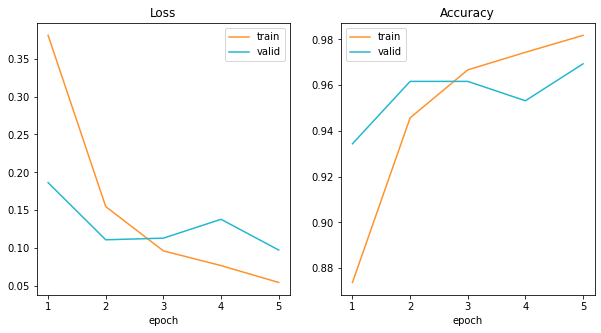

[Epoch 006]  Loss: 0.05440,  Acc: 98.194,  F1 Score: 0.93728  (04:37)
[Valid 006]  Loss: 0.07169,  Acc: 97.460,  F1 Score: 0.90058
Saved model: /opt/ml/output/models/2021-04-07 19:57:02.325826__.pth
[Epoch 007]  Loss: 0.05813,  Acc: 98.003,  F1 Score: 0.93037  (04:36)
[Valid 007]  Loss: 0.07719,  Acc: 97.407,  F1 Score: 0.93133
Saved model: /opt/ml/output/models/2021-04-07 20:01:58.246812__.pth
[Epoch 008]  Loss: 0.04489,  Acc: 98.604,  F1 Score: 0.95924  (04:36)
[Valid 008]  Loss: 0.05176,  Acc: 98.333,  F1 Score: 0.94117
Saved model: /opt/ml/output/models/2021-04-07 20:06:53.806792__.pth
[Epoch 009]  Loss: 0.04952,  Acc: 98.452,  F1 Score: 0.94930  (04:36)
[Valid 009]  Loss: 0.08675,  Acc: 97.381,  F1 Score: 0.91197
Saved model: /opt/ml/output/models/2021-04-07 20:11:49.820581__.pth
[Epoch 010]  Loss: 0.04314,  Acc: 98.604,  F1 Score: 0.94926  (04:36)
[Valid 010]  Loss: 0.04272,  Acc: 98.730,  F1 Score: 0.95298
Saved model: /opt/ml/output/models/2021-04-07 20:16:46.135767__.pth


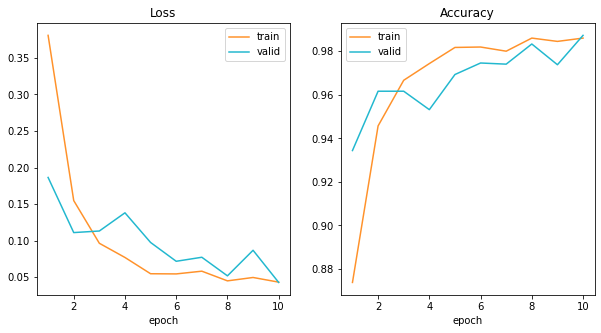

[Epoch 011]  Loss: 0.02573,  Acc: 99.167,  F1 Score: 0.97078  (04:37)
[Valid 011]  Loss: 0.06696,  Acc: 97.725,  F1 Score: 0.91032
Saved model: /opt/ml/output/models/2021-04-07 20:21:43.272592__.pth
[Epoch 012]  Loss: 0.04792,  Acc: 98.287,  F1 Score: 0.94022  (04:36)
[Valid 012]  Loss: 0.05370,  Acc: 98.333,  F1 Score: 0.95228
Saved model: /opt/ml/output/models/2021-04-07 20:26:39.199924__.pth
[Epoch 013]  Loss: 0.03947,  Acc: 98.710,  F1 Score: 0.96388  (04:36)
[Valid 013]  Loss: 0.07865,  Acc: 97.566,  F1 Score: 0.90016
Saved model: /opt/ml/output/models/2021-04-07 20:31:35.772892__.pth
[Epoch 014]  Loss: 0.04291,  Acc: 98.604,  F1 Score: 0.95501  (04:36)
[Valid 014]  Loss: 0.09634,  Acc: 97.275,  F1 Score: 0.91045
Saved model: /opt/ml/output/models/2021-04-07 20:36:32.416606__.pth
[Epoch 015]  Loss: 0.02041,  Acc: 99.345,  F1 Score: 0.98219  (04:36)
[Valid 015]  Loss: 0.12977,  Acc: 96.429,  F1 Score: 0.88723
Saved model: /opt/ml/output/models/2021-04-07 20:41:28.066400__.pth


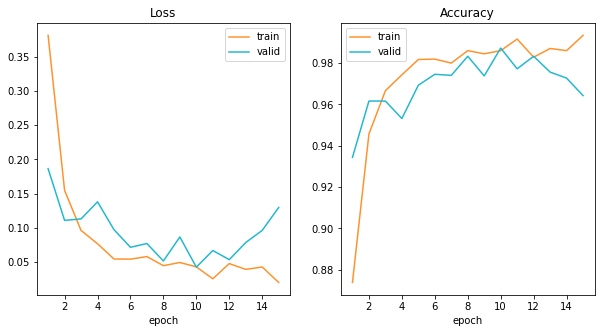

[Epoch 016]  Loss: 0.03828,  Acc: 98.690,  F1 Score: 0.95668  (04:36)
[Valid 016]  Loss: 0.19022,  Acc: 94.921,  F1 Score: 0.89050
Saved model: /opt/ml/output/models/2021-04-07 20:46:24.769314__.pth
[Epoch 017]  Loss: 0.03063,  Acc: 99.001,  F1 Score: 0.97132  (04:37)
[Valid 017]  Loss: 0.06885,  Acc: 98.016,  F1 Score: 0.93158
Saved model: /opt/ml/output/models/2021-04-07 20:51:21.823461__.pth
[Epoch 018]  Loss: 0.02970,  Acc: 99.021,  F1 Score: 0.96526  (04:36)
[Valid 018]  Loss: 0.03640,  Acc: 99.021,  F1 Score: 0.96051
Saved model: /opt/ml/output/models/2021-04-07 20:56:18.139910__.pth
[Epoch 019]  Loss: 0.04146,  Acc: 98.545,  F1 Score: 0.94952  (04:36)
[Valid 019]  Loss: 0.11666,  Acc: 96.746,  F1 Score: 0.90707
Saved model: /opt/ml/output/models/2021-04-07 21:01:14.621442__.pth
[Epoch 020]  Loss: 0.02264,  Acc: 99.306,  F1 Score: 0.98077  (04:36)
[Valid 020]  Loss: 0.07100,  Acc: 98.280,  F1 Score: 0.94965
Saved model: /opt/ml/output/models/2021-04-07 21:06:10.510012__.pth


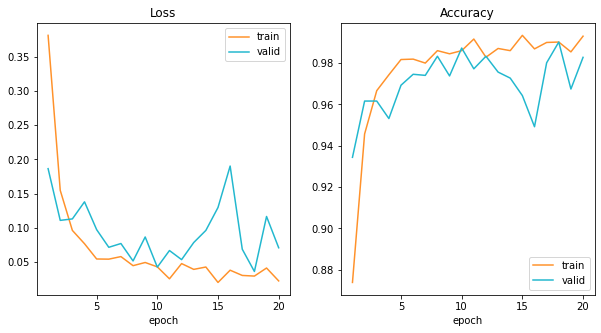


End of training. (end_lr=0.001)



'/opt/ml/output/models/2021-04-07 21:06:10.510012__.pth'

In [23]:
'''[BETTER THAN 1-LAYER CLASSIFIER]effnet-b0-multi (raw)(nn.CrossEntropyLoss)(AdamP)
>>> CHECKPOINTS
[lowest loss](0.03640)<- "/opt/ml/output/models/2021-04-07 20:56:18.139910__.pth"
[best f1 score](0.96051)<- "/opt/ml/output/models/2021-04-07 20:56:18.139910__.pth"
'''

# effnet_b0_multi = timm.models.efficientnet_b0(True)
# effnet_b0_multi.classifier = MultiheadClassifier(in_features=effnet_b0_multi.classifier.in_features)
# setattr(effnet_b0_multi, "name", "effnet-b0-multi-raw+ce(as)+adamp")
# effnet_b0_multi_logger = CSVLogger()

# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/all_',
#     model = effnet_b0_multi,
#     logger = effnet_b0_multi_logger, 
#     classifying = 'all', 
#     upscale = False,
#     criterion = nn.CrossEntropyLoss(),
#     optimizer = 'AdamP',
#     lr = 1e-3,
#     state_path = '/opt/ml/output/models/2021-04-07 20:56:18.139910__.pth',
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))

# trainer.train_and_save()

In [26]:
# b0-1a-age (raw)(CrossEntropyLoss)(MADGRAD)
'''CHECKPOINTS
[lowest loss]()   <-  ""
[best f1 score]() <-  ""
'''

# effnet_b0_1a = timm.models.efficientnet_b0(True)
# effnet_b0_1a.classifier = nn.Linear(effnet_b0_1a.classifier.in_features, 18)
# setattr(effnet_b0_1a, 'name', 'effnet-b0-1a-all-raw-madgrad_test')

# effnet_b0_1a_raw_logger = CSVLogger()



# branch = ConfigBranch(
#     train_path = '/opt/ml/input/data/train/all_',
#     model = effnet_b0_1a,
#     logger = effnet_b0_1a_logger, 
#     classifying = 'all', 
#     upscale = False,
#     criterion = nn.CrossEntropyLoss(),
#     optimizer = 'MADGRAD',
#     lr = 1e-3,
#     state_path = '',
# )

# config.path.train = branch.train_path
# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.train.optimizer.name = branch.optimizer
# config.train.lr.base = branch.lr
# config.train.weight_decay = 1e-4
# config.train.loss.criterion = branch.criterion
# config.model.state_path = branch.state_path

# try:
#     trainer().load_state_dict_to_model()
# except:
#     trainer().model.load_state_dict(load_and_fix_state_dict(config.model.state_path))
# trainer.train_and_save()

NameError: name 'effnet_b0_1a_logger' is not defined

In [3]:
# candidates = [
#     '2021-04-04 21:06:48.616452_effnet_b3_age_.pth', 
#     '2021-04-04 20:57:30.119399_effnet_b3_age_.pth', 
#     '2021-04-04 20:48:11.983449_effnet_b3_age_.pth', # best f1 score
#     '2021-04-04 20:38:54.592518_effnet_b3_age_.pth', 
#     '2021-04-04 20:38:54.592518_effnet_b3_age_.pth', # (redundance)
#     '2021-04-04 20:20:18.293577_effnet_b3_age_.pth', 
#     '2021-04-04 20:10:58.160324_effnet_b3_age_.pth', # lowest loss
#     '2021-04-04 20:01:39.279959_effnet_b3_age_.pth'
# ]
# config.model.model = effnet_b3_age
# config.model.classifying = 'age'
# for idx, cand in enumerate(candidates):
#     print(f"[{idx + 1}/{len(candidates)}]", end=" ")
#     config.model.state_path = os.path.join(config.path.models, cand)
#     trainer().load_state_dict_to_model()
#     trainer.valid()

In [ ]:
# b3-2da-age (raw)

# branch = ConfigBranch(
#     model = effnet_b3_2da_age_raw,
#     logger = effnet_b3_2da_age_raw_logger, 
#     classifying = 'age', 
#     upscale = False,
#     lr = 1e-6, #config.train.lr.low_limit / 10, #after end of training
#     state_path = '/opt/ml/output/models/2021-04-06 10:24:14.223154_effnet_b3_2da_age_.pth'
# )

# config.model.model = branch.model
# config.train.logger = branch.logger
# config.model.classifying = branch.classifying
# config.data.upscale = branch.upscale
# config.train.lr.base = branch.lr
# config.train.weight_decay = branch.lr / 10 # 1e-4 needed maybe
# config.model.state_path = branch.state_path

# trainer().load_state_dict_to_model() #nothing happens if not state_path
# trainer.train_and_save()

In [ ]:
# b3-2da-age (upscaled wo/ ColorJitter, Blur)

# branch = ConfigBranch(
#     model = effnet_b3_2da_age,
#     logger = effnet_b3_2da_age_logger, 
#     classifying = 'age', 
#     upscale = True,
#     lr = 1e-3, #config.train.lr.low_limit / 10, #after end of training
#     state_path = '/opt/ml/output/models/2021-04-06 08:13:31.727017_effnet_b3_2da_age_upscaled.pth'
# )

In [ ]:
# b0-2da-age (upscaled)

# branch = ConfigBranch(
#     model = effnet_b0_2da_age,
#     logger = effnet_b0_2da_age_logger, 
#     classifying = 'age', 
#     upscale = True,
#     lr = config.train.lr.low_limit / 10, #after end of training
#     state_path = '/opt/ml/output/models/2021-04-06 05:02:16.576047_effnet-b0-2da-age_upscaled.pth'
# )

In [ ]:
# b0-2da-all (upscaled)

# branch = ConfigBranch(
#     model = effnet_b0_2da,
#     logger = effnet_b0_2da_logger,
#     classifying = 'all', 
#     lr = config.train.lr.low_limit / 10,
#     state_path = '/opt/ml/output/models/archvie/2021-04-05 14:32:34.066673_effnet-b0-2da_upscaled.pth'
# )

In [ ]:
# b3-1a-age (raw)

# branch = ConfigBranch(
#     model = effnet_b3_age,
#     logger = effnet_b3_age_logger,
#     classifying = 'age',
#     upscale = False,
#     lr = 1e-4,
#     state_path = '/opt/ml/output/models/2021-04-06 00:25:58.199900_effnet_b3_age_upscaled.pth'
# )

In [ ]:
# b3-1a-age (upscaled)

# branch = ConfigBranch(
#     model = effnet_b3_age,
#     logger = effnet_b3_age_logger,
#     classifying = 'age', 
#     lr = config.train.lr.low_limit / 10,
#     state_path = '/opt/ml/output/models/2021-04-06 00:25:58.199900_effnet_b3_age_upscaled.pth'
# )

In [ ]:
# b3-2da-age (upscaled)

# branch = ConfigBranch(
#     model = effnet_b3_2d_age,
#     logger = effnet_b3_2d_age_logger, 
#     classifying = 'age', 
#     lr = config.train.lr.low_limit / 10,
#     state_path = '/opt/ml/output/models/2021-04-06 02:22:12.233049_effnet_b3_2d_age_upscaled.pth'
# )